# Dimensionality reduction and Feature Selection


We first import three useful libraries
1. numpy (matrix algebra):  we use np as a shortcut
2. plyplot from matplotlib: useful for plotting charts: we use plt as a shortcut
3. sklearn
3. use tab and shift+tab for help

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# this line plots graphs in line
%matplotlib inline

# Pearson correlation

In [9]:
from scipy.stats import pearsonr

In [10]:
# example 1
pearsonr([1,2,3],[1,2,3.1])

(0.99962228516121843, 0.017498096813278487)

In [5]:
#example 2
pearsonr([1,2,3,4,5,6],[2,4,10,8,10,12])

(0.90886906843896254, 0.012078855823236475)

In [6]:
#example 3
pearsonr([1,2,3,4,5,6],[6,5,4,3,2,1])

(-1.0, 0.0)

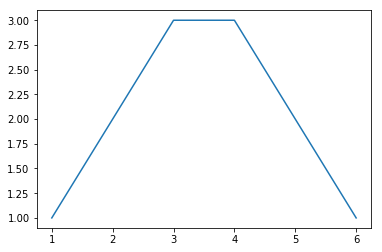

(0.0, 1.0)

In [8]:
#example 3
plt.plot([1,2,3,4,5,6],[1,2,3,3,2,1],"-")
plt.show()

pearsonr([1,2,3,4,5,6],[1,2,3,3,2,1])
#high bias

## Generating features that are linearly related

Pearson Coefficient =  (0.98302519551182688, 5.5210411881777431e-74)


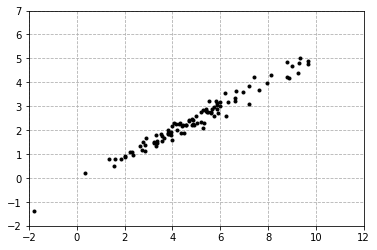

In [11]:
# we first produce some data whose scatter plot 
# exhibits a linear relationship
# y = mx + c or y = x
N=100
y_sigma=.25   # variance for y feature
x_sigma=np.sqrt(5.0)   # variance for X feature
#x = (np.random.rand(N)-0.5)*10
x = np.random.randn(N)*x_sigma+5   #Gaussian and shift
#x = np.arange(0,10,.02)
N=len(x)
y = np.copy(x)/2.0+np.random.randn(N)*y_sigma # line equation + gaussian noise
print 'Pearson Coefficient = ',pearsonr(x,y) 
fig, ax = plt.subplots()
ax.plot(x, y,'k.')
ax.set_xlim((-2,12))
ax.set_ylim((-2,7))
x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.set_aspect(1.0)
ax.grid(b=True, which='major', linestyle='--')
plt.show()

Pearson Coefficient =  (0.21752339555508016, 0.029706012049097664)


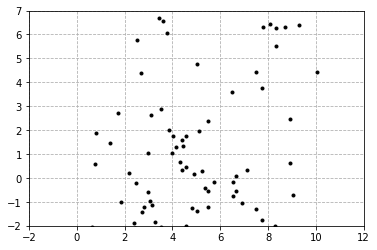

In [12]:
N=100
y_sigma=5.025   # variance for y feature
x_sigma=np.sqrt(5.0)   # variance for X feature
#x = (np.random.rand(N)-0.5)*10
x = np.random.randn(N)*x_sigma+5   #Gaussian and shift
#x = np.arange(0,10,.02)
N=len(x)
y = np.copy(x)/2.0+np.random.randn(N)*y_sigma # line equation + gaussian noise
print 'Pearson Coefficient = ',pearsonr(x,y) 
fig, ax = plt.subplots()
ax.plot(x, y,'k.')
ax.set_xlim((-2,12))
ax.set_ylim((-2,7))
x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.set_aspect(1.0)
ax.grid(b=True, which='major', linestyle='--')
plt.show()

## generating features that are non-linearly related

Pearson Coefficient =  (0.011066916743143911, 0.78675563507679513)


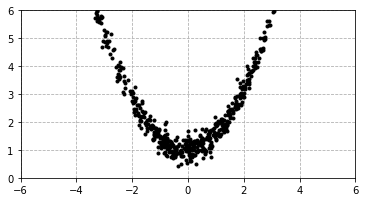

In [13]:
# we first produce some data whose scatter plot lies on a curve
# for example y = 0.5x^2 + 0.1x + 1.0
N=600
y_sigma=0.25
x = np.random.randn(N)*x_sigma
N=len(x)
#
#y = np.copy((x**2)/2.0 + (0.1*x)) + 1.0 + np.random.randn(N)*y_sigma # quadratic equation + gaussian noise
y = (0.5 * x**2) + (0.1*x) + 1 + np.random.randn(N)*y_sigma
#
print 'Pearson Coefficient = ',pearsonr(x,y) 
fig, ax = plt.subplots()
ax.plot(x, y,'k.')
ax.set_xlim((-6,6))
ax.set_ylim((0,6))
x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.set_aspect(1.0)
ax.grid(b=True, which='major', linestyle='--')
plt.show()

# Entropy

In [14]:
from scipy.stats import entropy
from sklearn.metrics import mutual_info_score
from sklearn.metrics import normalized_mutual_info_score

In [15]:
# skip this during lab session (useful for projects)
from sklearn.metrics import mutual_info_score
from sklearn.metrics import normalized_mutual_info_score

def calc_MI(x, y, bins):
    prob_xy = np.histogram2d(x, y, bins)
    c_xy=prob_xy[0]
    Hx = np.histogram(x,bins=prob_xy[1])
    Hy = np.histogram(y,bins=prob_xy[2])
    mi = mutual_info_score(None, None, contingency=c_xy)
    return mi,Hx

calc_MI(x,y,10)

(0.76339063028436371,
 (array([  3,  22,  55,  90, 156, 134,  91,  39,   8,   2]),
  array([-6.65836145, -5.28342824, -3.90849503, -2.53356182, -1.15862861,
          0.2163046 ,  1.59123781,  2.96617102,  4.34110423,  5.71603744,
          7.09097065])))

In [ ]:
# generate dataset with sklearn built in functions
# optional exercise at home

# Mutual Information

### Compute P(X), H(X)
### Compute P(Y), H(y)
### Compute P(X,Y)

In [16]:
#assume x,y
print 'N =',N
D=np.int(np.sqrt(N/5.0))
print 'D =',D
#D=20

N = 600
D = 10


In [20]:
# find probability distribution for x
fc, bn=np.histogram(x, bins=D)
fc+=1 # Laplace's smoothing
print fc
print bn
P_x = fc/np.float((fc.sum()))
print np.sum(P_x)
print P_x

[  4  23  56  91 157 135  92  40   9   3]
[-6.65836145 -5.28342824 -3.90849503 -2.53356182 -1.15862861  0.2163046
  1.59123781  2.96617102  4.34110423  5.71603744  7.09097065]
1.0
[ 0.00655738  0.03770492  0.09180328  0.14918033  0.25737705  0.22131148
  0.15081967  0.06557377  0.0147541   0.00491803]


In [40]:
# find probability distribution for y
# .....
#P_y=.....
def prob_XY(_input, _bins, laplace_corrector):
    fc,bn=np.histogram(_input, _bins)
    fc += laplace_corrector
    return fc/np.float((fc.sum())),bn

print(prob_XY(y, D, 1)[1])
P_y = prob_XY(y, D, 1)[0]

[  0.27474289   3.28061229   6.2864817    9.29235111  12.29822051
  15.30408992  18.30995932  21.31582873  24.32169813  27.32756754
  30.33343694]


In [42]:
# compute entropy for x and y
H_x = entropy(P_x,base=2)
print 'H_x=',H_x
H_y = entropy(P_y, base=2)
print 'H_y=',H_y

H_x= 2.69686146024
H_y= 1.5438757176


In [43]:
#
# Computer joint distribution for x and y; P_xy
#hist_xy=np.histogram2d(x, y, bins=[D,D])
#P_xy = hist_xy[0] / np.float(hist_xy[0].sum())
fc,bn1,bn2=np.histogram2d(x, y, bins=[D,D])
#add laplace smoothing
fc += 1
P_xy = fc / np.float(fc.sum())

print P_xy
#print P_xy[2,:]
#print np.sum(P_xy,axis=0)
#print P_xy[3,2]


[[ 0.00142857  0.00142857  0.00142857  0.00142857  0.00142857  0.00142857
   0.00142857  0.00285714  0.00142857  0.00285714]
 [ 0.00142857  0.00142857  0.00142857  0.00142857  0.00428571  0.00428571
   0.00285714  0.00142857  0.00142857  0.00142857]
 [ 0.00142857  0.00142857  0.01        0.02428571  0.00428571  0.00142857
   0.00142857  0.00142857  0.00142857  0.00142857]
 [ 0.00571429  0.07714286  0.02        0.00142857  0.00142857  0.00142857
   0.00142857  0.00142857  0.00142857  0.00142857]
 [ 0.16571429  0.00714286  0.00142857  0.00142857  0.00142857  0.00142857
   0.00142857  0.00142857  0.00142857  0.00142857]
 [ 0.21        0.00142857  0.00142857  0.00142857  0.00142857  0.00142857
   0.00142857  0.00142857  0.00142857  0.00142857]
 [ 0.19428571  0.00428571  0.00142857  0.00142857  0.00142857  0.00142857
   0.00142857  0.00142857  0.00142857  0.00142857]
 [ 0.01285714  0.07857143  0.01571429  0.00142857  0.00142857  0.00142857
   0.00142857  0.00142857  0.00142857  0.00142857]


In [54]:
# for log
import math

# Compute Mutual Information and normalise
m=D
n=D
print ("m = %d, n = %d" % (m,n))
I_xy=0.0
for i in range(m):
    for j in range(n):
        I_xy += P_xy[i,j] * math.log(P_xy[i,j] / (P_x[i] * P_y[j]) ,2)

print 'I_xy = ', I_xy
# we now normalize the mutual information
I_xyN= I_xy/(H_x  + H_y)
print 'I_xyN = ', I_xyN

m = 10, n = 10
I_xy =  0.957474241034
I_xyN =  0.225780141726


### Vector Algebra primer 

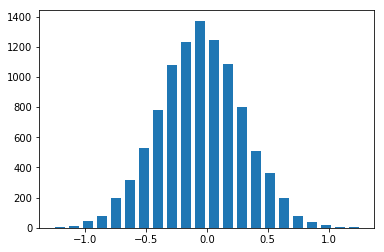

In [20]:
# generate 10 numbers guassian distributed, sigma=1
sigma=0.3450  #standard deviation
np.random.seed(1)
X1=np.random.randn(10000)*sigma
# generate histogram
#x_bin=np.arange(-4.0*sigma,3.5*sigma,sigma/3.0)+sigma/2.0
h,b=np.histogram(X1,bins=x_bin)
#h,b=np.histogram(X1)
#print h,b
plt.bar(b[:-1],h,width=sigma/4.0)
plt.show()
#print x_bin

In [71]:
# calculate mean and sigma
print 'Mean=',np.mean(X1)
print 'variance = ',np.std(X1)**2.0
print 'standard deviation = ',np.std(X1)

Mean= 0.00337156656119
variance =  0.118736145554
standard deviation =  0.344581116072


In [72]:
X2=np.random.normal(loc=0.0,scale=0.345,size=100000)  # scale is standard deviation
print 'Mean=',np.mean(X2)
print 'variance = ',np.std(X2)**2.0
print 'standard deviation = ',np.std(X2)
print 'variance = ',np.var(X2)

Mean= 0.00112914225612
variance =  0.11860792853
standard deviation =  0.344395018155
variance =  0.11860792853


### Co-Variance

co-variance = 
[[ 5.11577291  5.14605978]
 [ 5.14605978  6.24250223]]


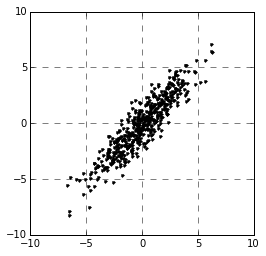

In [73]:
# we first produce some data whose scatter plot lies on a straight line +ve
# y = mx + c or y = x
N=500
y_sigma=1.0
x_sigma=np.sqrt(5.0)
#x = (np.random.rand(N)-0.5)*10
x = np.random.randn(N)*x_sigma
y = np.copy(x)+np.random.randn(N)*y_sigma
print 'co-variance = '
print np.cov(x,y) 
fig, ax = plt.subplots()
ax.plot(x, y,'k.')
ax.set_xlim((-10,10))
ax.set_ylim((-10,10))
x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.set_aspect(1.0)
ax.grid(b=True, which='major', linestyle='--')
plt.show()

co-variance = 
[[ 4.86661582 -4.82600369]
 [-4.82600369  5.74920155]]


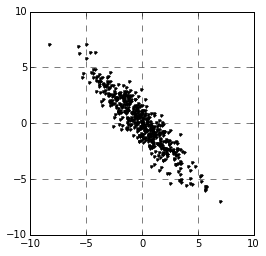

In [74]:
# we first produce some data whose scatter plot lies on a straight line -ve
# y = mx + c or y = -x
N=500
y_sigma=1.0
x_sigma=np.sqrt(5.0)
x = np.random.randn(N)*x_sigma
y = ....
print 'co-variance = '
print np.cov(x,y) 
fig, ax = plt.subplots()
ax.plot(x, y,'k.')
ax.set_xlim((-10,10))
ax.set_ylim((-10,10))
x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.set_aspect(1.0)
ax.grid(b=True, which='major', linestyle='--')
plt.show()

co-variance = 
[[ 5.34834065 -0.07278307]
 [-0.07278307  1.05048647]]


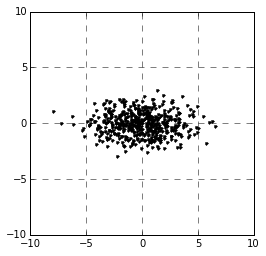

In [75]:
# we first produce some data whose scatter plot lies on a straight line
# y = mx + c or y = -x
N=500
y_sigma=1.0
x_sigma=np.sqrt(5.0)
x = np.random.randn(N)*x_sigma
y = np.random.randn(N)*y_sigma
print 'co-variance = '
print np.cov(x,y) 
fig, ax = plt.subplots()
ax.plot(x, y,'k.')
ax.set_xlim((-10,10))
ax.set_ylim((-10,10))
x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.set_aspect(1.0)
ax.grid(b=True, which='major', linestyle='--')
plt.show()


co-variance = 
[[ 0.87801123 -0.00704813]
 [-0.00704813  5.62053554]]


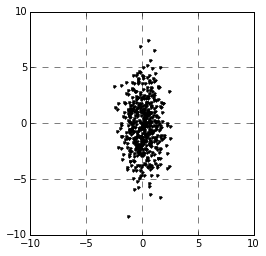

In [76]:
# we first produce some data whose scatter plot lies on a straight line
# y = mx + c or y = -x
N=500
x_sigma=1.0
y_sigma=np.sqrt(5.0)
x = np.random.randn(N)*x_sigma
y = np.random.randn(N)*y_sigma
print 'co-variance = '
print np.cov(x,y) 
#
fig, ax = plt.subplots()
#colors = ['k']*len(x)
ax.plot(x, y,'k.')
ax.set_xlim((-10,10))
ax.set_ylim((-10,10))
x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.set_aspect(1.0)
#ax.grid(b=True, which='major', color='k', linestyle='--')
ax.grid(b=True, which='major', linestyle='--')
#fig.savefig('cov.png', dpi=600)
plt.show()
#plt.close(fig)

## example for covariance on a dataset

## Transformation matrix

In [77]:
#Example
A=np.matrix('3 0,; 8 -1')
y=np.matrix('1 5')
x=np.matrix('1 0')

print 'A=\n',A
print y.shape
print 'y=',y
print 'y\'=',np.transpose(A*np.transpose(y))
print 'x\'=',np.transpose(A*np.transpose(x))
x=np.matrix('1 2')
print 'x\'=',np.transpose(A*np.transpose(x))






A=
[[ 3  0]
 [ 8 -1]]
(1, 2)
y= [[1 5]]
y'= [[3 3]]
x'= [[3 8]]
x'= [[3 6]]


## Eigen Vectors

In [55]:
A=np.matrix('2 3; 2 1')
print A
print 'eigen values = ',np.linalg.eigvals(A)
print 'eigen vectors = '
print np.linalg.eig(A)[1]

[[2 3]
 [2 1]]
eigen values =  [ 4. -1.]
eigen vectors = 
[[ 0.83205029 -0.70710678]
 [ 0.5547002   0.70710678]]


# PCA

Var(x) =  5.75744577275
Var(y) =  8.47755355692
co-variance = 
[[ 5.76898374  5.51014721]
 [ 5.51014721  8.49454264]]


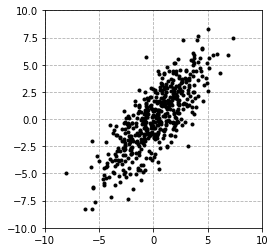

In [56]:
# we first produce some data whose scatter plot lies on a straight line
# y = mx + c or y = x
N=500
y_sigma=1.8
x_sigma=np.sqrt(6.0)
x = np.random.randn(N)*x_sigma
y = np.copy(x)+np.random.randn(N)*y_sigma
print "Var(x) = ",np.var(x)
print "Var(y) = ",np.var(y)
print 'co-variance = '
print np.cov(x,y) 
fig, ax = plt.subplots()
ax.plot(x, y,'k.')
ax.set_xlim((-10,10))
ax.set_ylim((-10,10))
x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.set_aspect(1.0)
ax.grid(b=True, which='major', linestyle='--')
plt.show()

In [58]:
X=np.zeros([N,2])
X[:,0]=np.copy(x)
X[:,1]=np.copy(y)
print 'shape=',X.shape
XX=np.matrix(X)
np.transpose(XX)*XX/(N-1)

shape= (500, 2)


matrix([[ 5.79053424,  5.52708577],
        [ 5.52708577,  8.50785624]])

In [59]:
print XX.shape
XXX=XX.T
print XXX.shape
C=XX.T*XX/(N-1)
C.shape
CC=XXX*XXX.T/(N-1)
print CC.shape
print C
print CC

(500, 2)
(2, 500)
(2, 2)
[[ 5.79053424  5.52708577]
 [ 5.52708577  8.50785624]]
[[ 5.79053424  5.52708577]
 [ 5.52708577  8.50785624]]


# PCA from Richert & Coelho (sklearn)

In [82]:
x1 = np.arange(0,10,.2)
x2 = x1 + np.random.normal(loc=0.0, scale=1.0, size=len(x1))
X=np.c_[(x1,x2)]
good=(x1>5) | (x2>5)  # some arbitrary classes
bad = ~good # to make the example look good

In [66]:
from sklearn import linear_model, decomposition, datasets
pca = decomposition.PCA(n_components=2)

In [84]:
Xtrans = pca.fit_transform(X)
print pca.explained_variance_ratio_
print pca.get_covariance()
print pca.explained_variance_
print pca.components_

[ 0.98279089  0.01720911]
[[ 8.33        7.97177575]
 [ 7.97177575  8.18256622]]
[ 16.22839969   0.28416653]
[[ 0.71036851  0.70382994]
 [-0.70382994  0.71036851]]


In [85]:
(8.33+9.24)

17.57

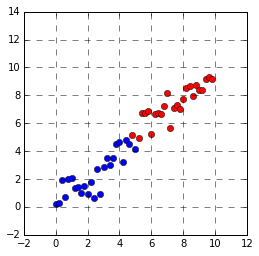

In [87]:
# plot features original
fig, ax = plt.subplots()
for i in range(len(good)):
    if good[i]:
        ax.plot(X[i,0], X[i,1],c='r',marker='o')
    else:
        ax.plot(X[i,0], X[i,1],c='b',marker='o')
ax.set_xlim((-2,12))
ax.set_ylim((-2,14))
x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.set_aspect(abs(x1-x0)/abs(y1-y0))
ax.grid(b=True, which='major', linestyle='--')
plt.show()

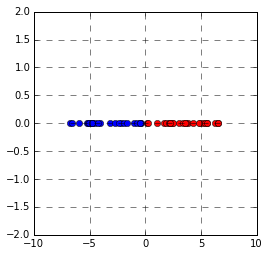

In [88]:
# plot features transformed
fig, ax = plt.subplots()
for i in range(len(good)):
    if good[i]:
        ax.plot(Xtrans[i,0], 0,c='r',marker='o')
    else:
        ax.plot(Xtrans[i,0], 0,c='b',marker='o')
ax.set_xlim((-10,10))
ax.set_ylim((-2,2))
x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.set_aspect(abs(x1-x0)/abs(y1-y0))
ax.grid(b=True, which='major', linestyle='--')
plt.show()

# manual pca

1. Let d = feature dimensionality
2. Let N= number of examples in dataset
3. Organise data as a centred matrix X=[N,d], where N=#rows, d=#col
4. We want to reduce dimensionality to k.
5. After reduction we end up with a dataset X' = [N,k], where k<=p
6. We carry out the following:
7. Compute the covariance matrix M=X'X. This is a [d,d] matrix.
8. Compute the eigenvalues and eigenvectors. ev is a [d,d] matrix
9. Choose the first k largest eigenvalues, i.e [k,d] matrix
10. Project the data onto the eigenvectors, i.e [N,k] matrix

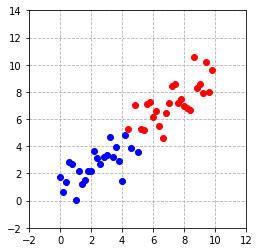

In [60]:
# Generate data set [from Richert & Coelho]
np.random.seed(0)
x1 = np.arange(0,10,.2)
x2 = x1 + np.random.normal(loc=0.0, scale=1.0, size=len(x1))
X=np.matrix(np.c_[(x1,x2)])
good=(x1>5) | (x2>5)  # some arbitrary classes
bad = ~good # to make the example look good
#
#Plot dataset using original (d) features
fig, ax = plt.subplots()
for i in range(len(good)):
    if good[i]:
        ax.plot(X[i,0], X[i,1],c='r',marker='o')
    else:
        ax.plot(X[i,0], X[i,1],c='b',marker='o')
ax.set_xlim((-2,12))
ax.set_ylim((-2,14))
x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.set_aspect(abs(x1-x0)/abs(y1-y0))
ax.grid(b=True, which='major', linestyle='--')
plt.show()

shape of datatset matrix =  (50, 2)
N = 50
d = 2
mean_X = [[ 4.9         5.04055927]]
First few examples from dataset:


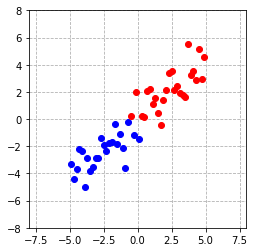

In [62]:
# Organise data as a centred matrix X=[N,p], where N=#rows, p=#col
#
print 'shape of datatset matrix = ',X.shape 
N,d = X.shape
print 'N =',N
print 'd =',d
mean_X = np.mean(X, axis=0)
print 'mean_X =',mean_X
#subtract mean

X = X - mean_X
print 'First few examples from dataset:'
X[0:5,:]
#
#Plot dataset using original (d) centred features
fig, ax = plt.subplots()
for i in range(len(good)):
    if good[i]:
        ax.plot(X[i,0], X[i,1],c='r',marker='o')
    else:
        ax.plot(X[i,0], X[i,1],c='b',marker='o')
ax.set_xlim((-8,8))
ax.set_ylim((-8,8))
x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.set_aspect(abs(x1-x0)/abs(y1-y0))
ax.grid(b=True, which='major', linestyle='--')
plt.show()

In [63]:
# Compute the covariance matrix M=X'X. This is a [d,d] matrix.
#
# using built in function:
print np.cov(X.T)
# Using matrix operations
M=np.cov(X.T)
print M
#compute trace
print 'M trace =',M.trace()

[[ 8.5         7.27563355]
 [ 7.27563355  7.34392205]]
[[ 8.5         7.27563355]
 [ 7.27563355  7.34392205]]
M trace = 15.8439220476


In [64]:
#we can use single value decomposition to compite eigen values
U,S,V = np.linalg.svd(M)
# U :
# S : Variance
# V : Eigen vectors
print V
print S
print S/np.sum(S)

[[-0.73457438 -0.67852817]
 [-0.67852817  0.73457438]]
[ 15.22052065   0.6234014 ]
[ 0.96065359  0.03934641]


In [67]:
# This is for comparison only
Xtr = pca.fit_transform(X)
print pca.explained_variance_ratio_
print pca.get_covariance()
print pca.explained_variance_
print pca.components_

[ 0.96065359  0.03934641]
[[ 8.5         7.27563355]
 [ 7.27563355  7.34392205]]
[ 15.22052065   0.6234014 ]
[[ 0.73457438  0.67852817]
 [ 0.67852817 -0.73457438]]


In [69]:
# Compute the eigenvalues and eigenvectors. ev is a [d,d] matrix
# e : eigenvalues [d]
# ev : egenvectors [d,d]
e, EV= np.linalg.eigh(M)
# reverse order of arrays, since we want maxium on top
e=e[::-1]
EV=EV[::-1]
print 'Eigenvalues = '
print e
print ' e sum = ',e.sum()
print 'Eigenvectors = '
print EV
# check that eigenvectors are uncorrelated
# dot product is zero
#np.dot(EV[0],EV[1].T)
print EV[0]*EV[1].T

Eigenvalues = 
[ 15.22052065   0.6234014 ]
 e sum =  15.8439220476
Eigenvectors = 
[[-0.73457438 -0.67852817]
 [ 0.67852817 -0.73457438]]
[-0.49842941  0.49842941]


In [70]:
# Choose the first k largest eigenvalues, i.e [k,d] matrix
# we will choose the .......
V=EV[0,]
#print the chosen eigen vector
print V

[-0.73457438 -0.67852817]


shape of X_new = (50, 1)


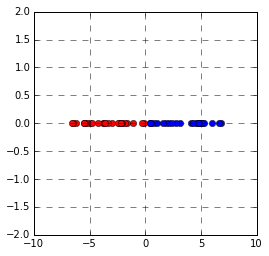

In [95]:
# Project the data onto the eigenvectors, i.e [N,k] matrix
# Xt is data projected on eigenvector
Xt=......
print 'shape of X_new =',Xt.shape 
# plot features transformed
fig, ax = plt.subplots()
for i in range(len(good)):
    if good[i]:
        ax.plot(Xt[i,0], 0,c='r',marker='o')
    else:
        ax.plot(Xt[i,0], 0,c='b',marker='o')
#ax.set_xlim((-2,2))
ax.set_xlim((-10,10))
ax.set_ylim((-2,2))
x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.set_aspect(abs(x1-x0)/abs(y1-y0))
ax.grid(b=True, which='major', linestyle='--')
plt.show()

# PCA from Richert & Coelho (sklearn)

In [96]:
x1 = np.arange(0,10,.2)
x2 = x1 + np.random.normal(loc=0.0, scale=1.0, size=len(x1))
X=np.c_[(x1,x2)]
good=(x1>5) | (x2>5)  # some arbitrary classes
bad = ~good # to make the example look good

In [97]:
from sklearn import linear_model, decomposition, datasets
pca = decomposition.PCA(n_components=2)

In [98]:
Xtrans = .....
print pca.explained_variance_ratio_
print pca.get_covariance()
print pca.explained_variance_
print pca.components_

[ 0.97952467  0.02047533]
[[  8.33         9.09963469]
 [  9.09963469  10.8236724 ]]
[ 18.76149471   0.39217769]
[[ 0.65736137  0.75357549]
 [-0.75357549  0.65736137]]


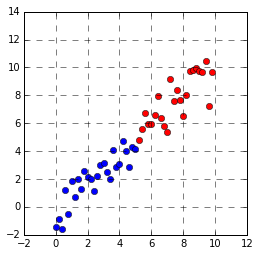

In [99]:
# plot features original
fig, ax = plt.subplots()
for i in range(len(good)):
    if good[i]:
        ax.plot(X[i,0], X[i,1],c='r',marker='o')
    else:
        ax.plot(X[i,0], X[i,1],c='b',marker='o')
ax.set_xlim((-2,12))
ax.set_ylim((-2,14))
x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.set_aspect(abs(x1-x0)/abs(y1-y0))
ax.grid(b=True, which='major', linestyle='--')
plt.show()

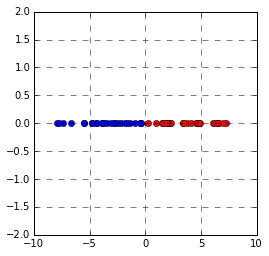

In [100]:
# plot features transformed
fig, ax = plt.subplots()
for i in range(len(good)):
    if good[i]:
        ax.plot(Xtrans[i,0], 0,c='r',marker='o')
    else:
        ax.plot(Xtrans[i,0], 0,c='b',marker='o')
ax.set_xlim((-10,10))
ax.set_ylim((-2,2))
x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.set_aspect(abs(x1-x0)/abs(y1-y0))
ax.grid(b=True, which='major', linestyle='--')
plt.show()

# PCA vs LDA

In [101]:
x1 = np.arange(0,10,.2)
x2 = x1 + np.random.normal(loc=0.0, scale=1.0, size=len(x1))
X=np.c_[(x1,x2)]
good=(x1>x2)  # some arbitrary classes
bad = ~good # to make the example look good

In [102]:
from sklearn import linear_model, decomposition, datasets
pca = decomposition.PCA(n_components=2)

In [103]:
Xtrans = ....)
print pca.explained_variance_ratio_
print pca.get_covariance()
print pca.explained_variance_
print pca.components_

[ 0.97050158  0.02949842]
[[ 8.33        7.7637807 ]
 [ 7.7637807   8.17192768]]
[ 16.01514683   0.48678085]
[[ 0.7106967   0.70349855]
 [ 0.70349855 -0.7106967 ]]


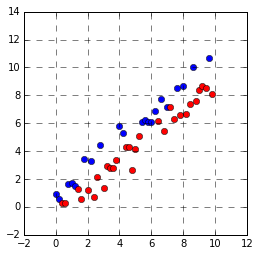

In [104]:
# plot features original
fig, ax = plt.subplots()
for i in range(len(good)):
    if good[i]:
        ax.plot(X[i,0], X[i,1],c='r',marker='o')
    else:
        ax.plot(X[i,0], X[i,1],c='b',marker='o')
ax.set_xlim((-2,12))
ax.set_ylim((-2,14))
x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.set_aspect(abs(x1-x0)/abs(y1-y0))
ax.grid(b=True, which='major', linestyle='--')
plt.show()

NameError: name 'Xtrans' is not defined

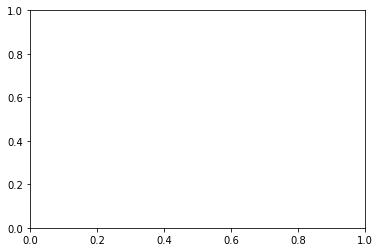

In [72]:
# plot features transformed
fig, ax = plt.subplots()
for i in range(len(good)):
    if good[i]:
        ax.plot(Xtrans[i,0], 0,c='r',marker='o')
    else:
        ax.plot(Xtrans[i,0], 0,c='b',marker='o')
ax.set_xlim((-10,10))
ax.set_ylim((-2,2))
x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.set_aspect(abs(x1-x0)/abs(y1-y0))
ax.grid(b=True, which='major', linestyle='--')
plt.show()

In [108]:
from sklearn import discriminant_analysis
lda_t=discriminant_analysis.LinearDiscriminantAnalysis(n_components=10)
Xtrans = .....

NameError: name 'Xtrans' is not defined

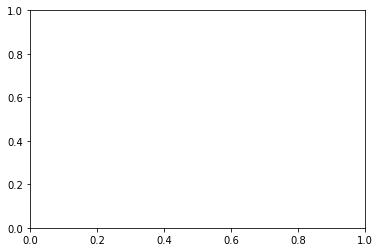

In [71]:
# plot features transformed
fig, ax = plt.subplots()
for i in range(len(good)):
    if good[i]:
        ax.plot(Xtrans[i,0], 0,c='r',marker='o')
    else:
        ax.plot(Xtrans[i,0], 0,c='b',marker='o')
ax.set_xlim((-10,10))
ax.set_ylim((-2,2))
x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.set_aspect(abs(x1-x0)/abs(y1-y0))
ax.grid(b=True, which='major', linestyle='--')
plt.show()

# Feature selection (Wrapper) from sklearn

In [111]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification


In [112]:
X,y = make_classification(n_samples=100, n_features=10, n_informative=3, random_state=0)
print X[0:5,0:5]


[[ 1.04797216  0.28427967  1.74266878  0.10598387 -0.06140967]
 [-0.03509518  1.26507784  0.21149701 -1.83036528 -1.63277265]
 [-1.2845523  -0.10434349 -0.98800194  1.71859916  1.00089777]
 [-0.51423397 -1.01804188 -0.07785476 -0.20133222  2.77695878]
 [ 1.01184243 -0.65795104  0.46838523 -0.34932837 -2.39634209]]


In [113]:
clf = LogisticRegression()
clf.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [114]:
selector=RFE(clf, n_features_to_select=10)
selector=....
#print selector.support_
print selector.ranking_

[7 1 4 1 1 3 2 8 6 5]


In [115]:
selector=RFE(clf, n_features_to_select=1)
selector=....
#print selector.support_
print selector.ranking_
selector=RFE(clf, n_features_to_select=2)
selector=...
#print selector.support_
print selector.ranking_
selector=RFE(clf, n_features_to_select=3)
selector=...
#print selector.support_
print selector.ranking_

[ 9  3  6  2  1  5  4 10  8  7]
[8 2 5 1 1 4 3 9 7 6]
[7 1 4 1 1 3 2 8 6 5]
